# Importownie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Wczytywanie danych

In [2]:
iris = load_iris()
data = iris.data
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Dopasowywanie modelu

In [4]:
from numpy.linalg import inv
from numpy.linalg import pinv

def sum_of_squares(tab):
    return sum([i * i for i in tab])
    #return reduce(lambda i, j: i + j * j, [tab[:1][0]**2]+tab[1:])

def fit_model(Z, y):
    B = np.dot(pinv(np.dot(Z.transpose(), Z)), np.dot(Z.transpose(), y))
    y_pred = np.dot(B.transpose(), Z.transpose())
    avg_y = np.mean(y)
    avg_prediction = np.mean(y_pred)
    sos_y = sum_of_squares(y - avg_y)
    sos_pred = sum_of_squares(y_pred - avg_y)
    R_2 = sos_pred / sos_y
    print("Współczynniki modelu: ", B)
    print('y_śr: ',avg_y)
    print("Suma kwadratów y-y_śr: ",sos_y)
    print("Suma kwadratów y_pred-y_śr: ", sos_pred)
    print("R_2:",R_2)
    return B, y_pred

# Wizualizacja modelu dla wielu zmiennych objaśniających

In [5]:
def visualize_model(y, y_pred, title):
    plt.plot(y_pred, color='blue', label = 'Predictions')
    plt.plot(y, color='red', label = 'True values')
    plt.title(label = title)
    plt.legend()
    plt.show()   

In [6]:
type(iris.feature_names[0])

str

# Stworzenie modeli dla każdej zmiennej w zależności od trzech pozostałych

Współczynniki modelu:  [ 1.85599749  0.65083716  0.70913196 -0.55648266]
y_śr:  5.843333333333334
Suma kwadratów y-y_śr:  102.16833333333331
Suma kwadratów y_pred-y_śr:  87.72292841964723
R_2: 0.8586117200663668


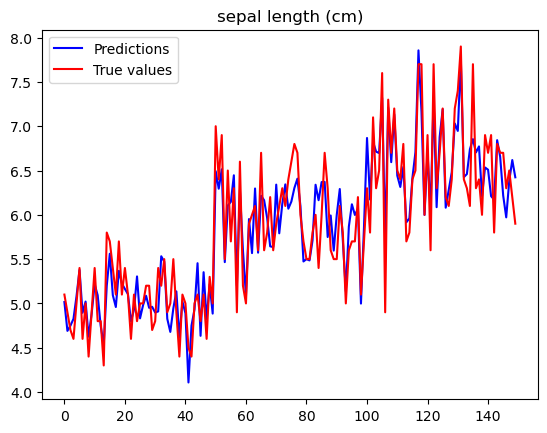

Współczynniki modelu:  [ 0.60706601  1.04308908 -0.58603225  0.55803034]
y_śr:  3.0573333333333337
Suma kwadratów y-y_śr:  28.306933333333323
Suma kwadratów y_pred-y_śr:  14.83303406807474
R_2: 0.5240071007836035


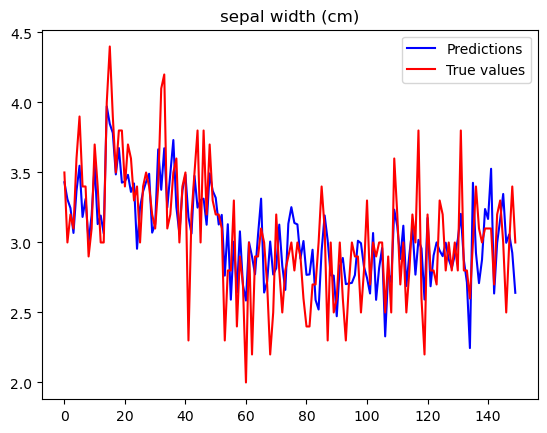

Współczynniki modelu:  [ 0.72913845 -0.64601244 -0.2627112   1.44679341]
y_śr:  3.7580000000000005
Suma kwadratów y-y_śr:  464.32540000000046
Suma kwadratów y_pred-y_śr:  449.4724520272827
R_2: 0.968011769391212


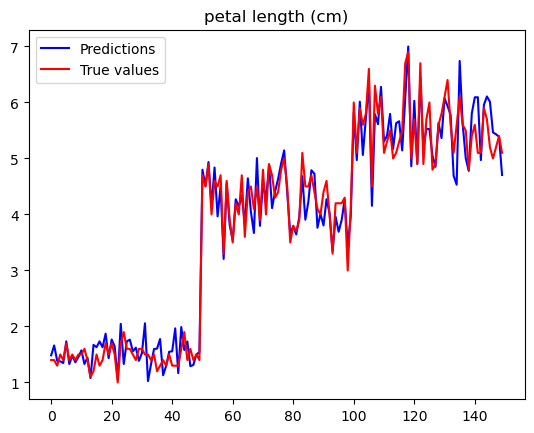

Współczynniki modelu:  [-0.20726607  0.22282854  0.52408311 -0.24030739]
y_śr:  1.1993333333333336
Suma kwadratów y-y_śr:  86.56993333333328
Suma kwadratów y_pred-y_śr:  81.18963566260433
R_2: 0.9378502736046662


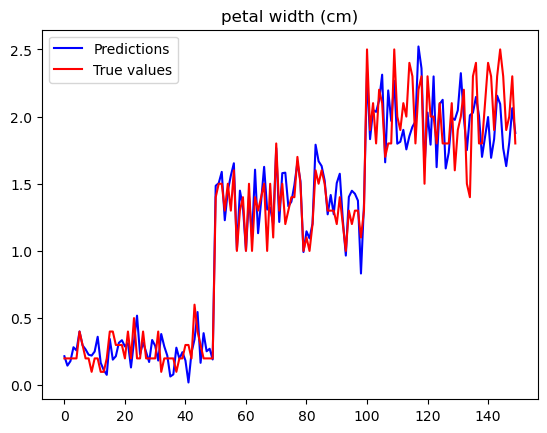

In [7]:
for i in range(0, 4):
    df = pd.DataFrame(data)
    y = np.array(df[i])
    df[i] = 1
    Z = np.array(df)
    coeff, predictions = fit_model(Z, y)
    visualize_model(y, predictions, iris.feature_names[i])

# Wizualizacja modelu dla jednej zmiennej objaśniającej

In [13]:
def visualize_2D(x, y, y_pred, title):
    plt.scatter(x, y, color = 'blue', label='True values')
    plt.plot(x, y_pred, color = 'red', label='Predictions')
    plt.title(label = title)
    plt.legend()
    plt.show()  

# Stworzenie modeli dla każdej zmiennej w zależności od jednej zmiennej

Współczynniki modelu:  [-0.22336106  6.52622255]
y_śr:  5.843333333333334
Suma kwadratów y-y_śr:  102.16833333333331
Suma kwadratów y_pred-y_śr:  1.412237535837405
R_2: 0.013822654141081601


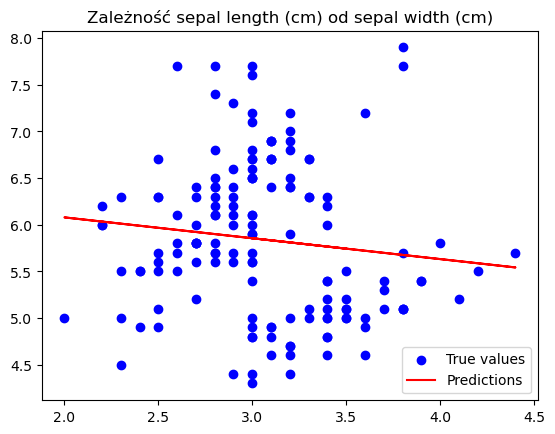

Współczynniki modelu:  [0.40892228 4.30660342]
y_śr:  5.843333333333334
Suma kwadratów y-y_śr:  102.16833333333331
Suma kwadratów y_pred-y_śr:  77.64329956749985
R_2: 0.7599546457724984


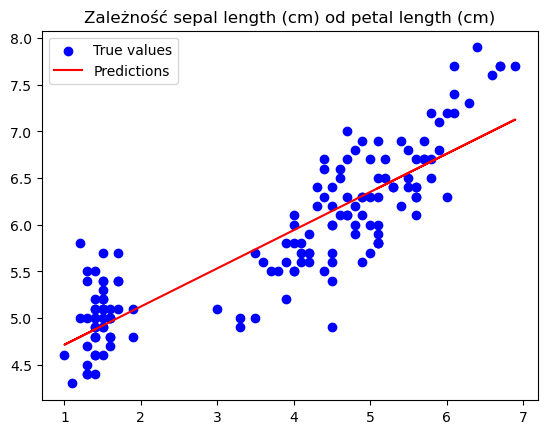

Współczynniki modelu:  [0.88858025 4.77762942]
y_śr:  5.843333333333334
Suma kwadratów y-y_śr:  102.16833333333331
Suma kwadratów y_pred-y_śr:  68.35344363721725
R_2: 0.6690276860464


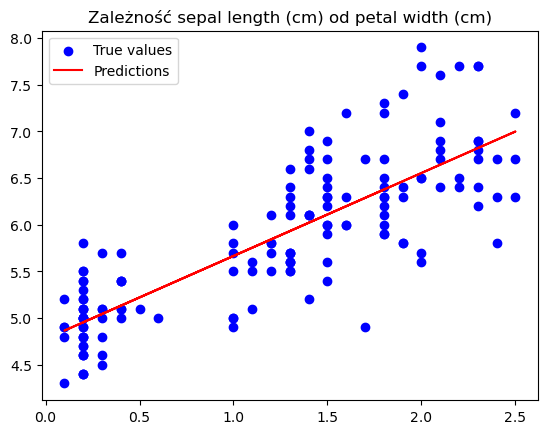

Współczynniki modelu:  [-0.0618848   3.41894684]
y_śr:  3.0573333333333337
Suma kwadratów y-y_śr:  28.306933333333323
Suma kwadratów y_pred-y_śr:  0.3912769492613796
R_2: 0.013822654141083685


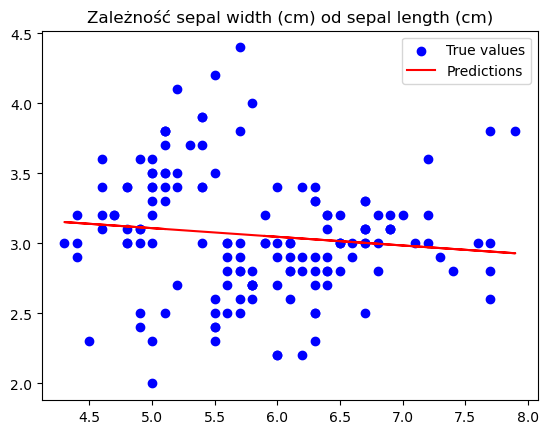

Współczynniki modelu:  [-0.1057853   3.45487448]
y_śr:  3.0573333333333337
Suma kwadratów y-y_śr:  28.306933333333323
Suma kwadratów y_pred-y_śr:  5.196046809931478
R_2: 0.1835609229987758


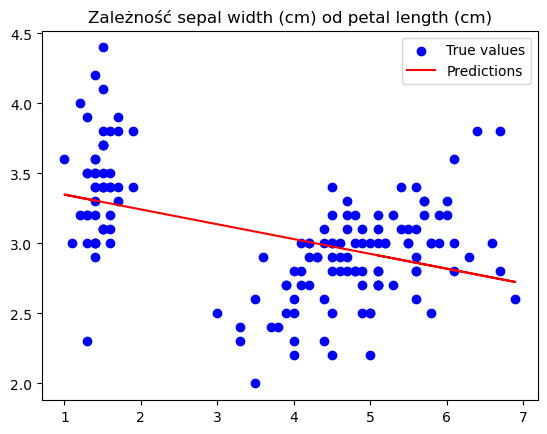

Współczynniki modelu:  [-0.20935983  3.30842556]
y_śr:  3.0573333333333337
Suma kwadratów y-y_śr:  28.306933333333323
Suma kwadratów y_pred-y_śr:  3.7944934177046536
R_2: 0.13404819847568517


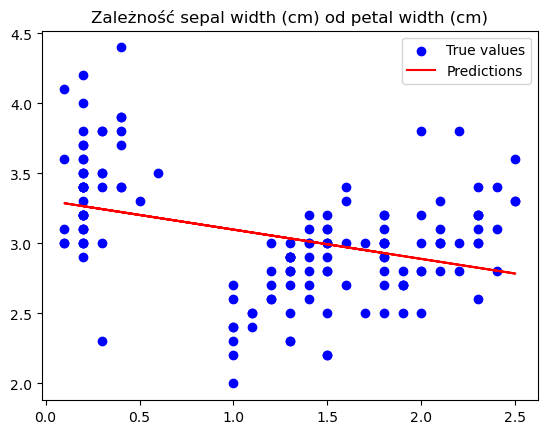

Współczynniki modelu:  [ 1.85843298 -7.10144337]
y_śr:  3.7580000000000005
Suma kwadratów y-y_śr:  464.32540000000046
Suma kwadratów y_pred-y_śr:  352.86624488021585
R_2: 0.7599546457725885


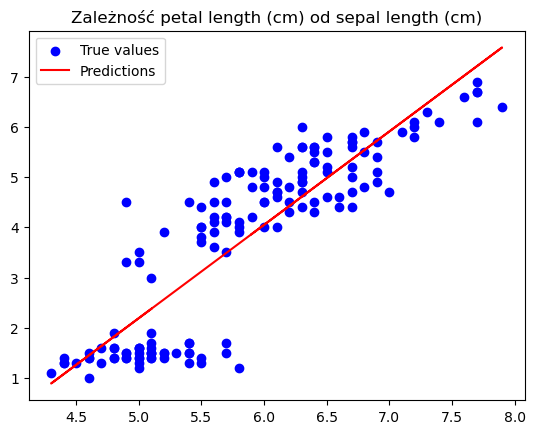

Współczynniki modelu:  [-1.73522152  9.06315061]
y_śr:  3.7580000000000005
Suma kwadratów y-y_śr:  464.32540000000046
Suma kwadratów y_pred-y_śr:  85.23199899578134
R_2: 0.1835609229987876


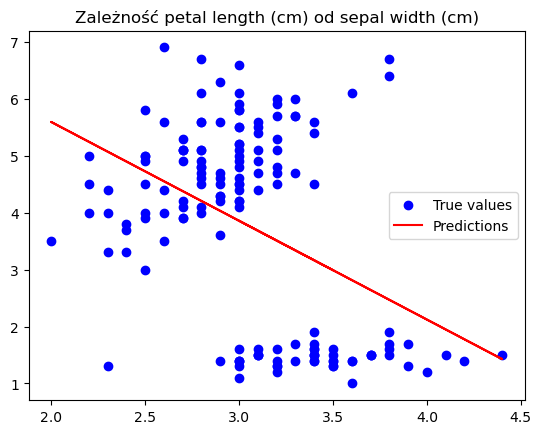

Współczynniki modelu:  [2.2299405  1.08355803]
y_śr:  3.7580000000000005
Suma kwadratów y-y_śr:  464.32540000000046
Suma kwadratów y_pred-y_śr:  430.4806468331945
R_2: 0.9271098389904883


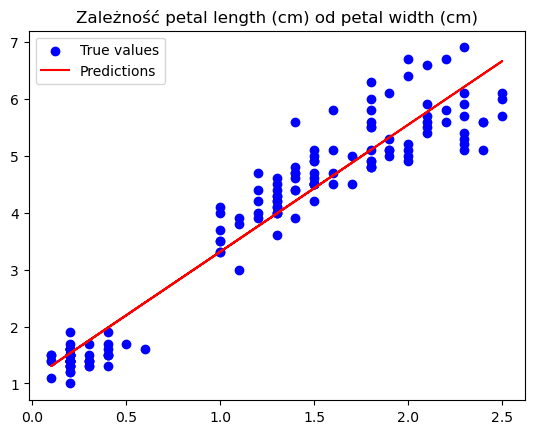

Współczynniki modelu:  [ 0.75291757 -3.200215  ]
y_śr:  1.1993333333333336
Suma kwadratów y-y_śr:  86.56993333333328
Suma kwadratów y_pred-y_śr:  57.91768217919871
R_2: 0.6690276860464881


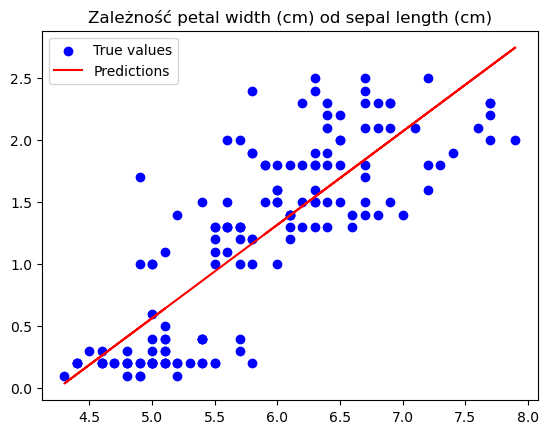

Współczynniki modelu:  [-0.64027659  3.15687229]
y_śr:  1.1993333333333336
Suma kwadratów y-y_śr:  86.56993333333328
Suma kwadratów y_pred-y_śr:  11.604543605494172
R_2: 0.13404819847569302


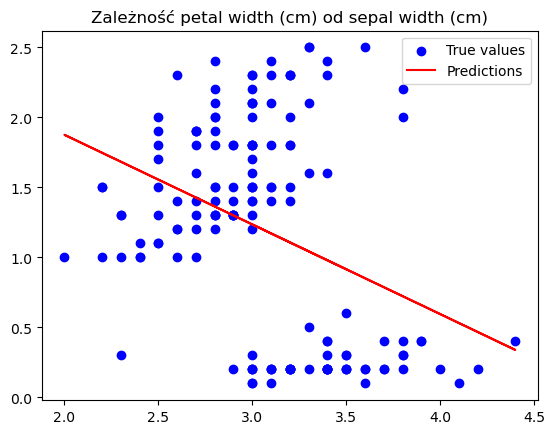

Współczynniki modelu:  [ 0.41575542 -0.36307552]
y_śr:  1.1993333333333336
Suma kwadratów y-y_śr:  86.56993333333328
Suma kwadratów y_pred-y_śr:  80.25983695408473
R_2: 0.9271098389904976


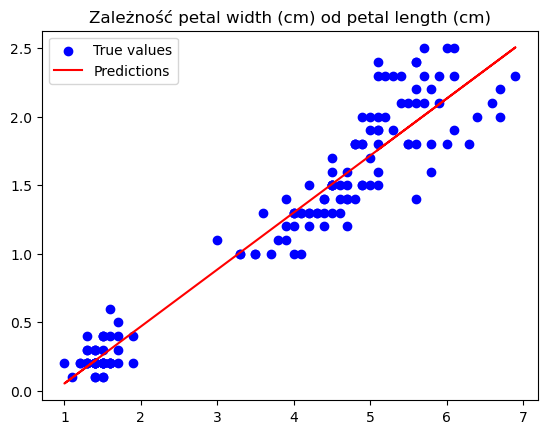

In [14]:
for i in range(0, 4):
    for j in range(0, 4):
        if i is not j:
            df = pd.DataFrame(data)
            y = np.array(df[i])
            x = np.array(df[j])
            Z = np.array(np.vstack([df[j],[1] * len(df[j])])).transpose()
            coeff, predictions = fit_model(Z, y)
            visualize_2D(x, y, predictions, 'Zależność ' + iris.feature_names[i]  + ' od ' + iris.feature_names[j])